#### Question 1
Occupations  
Step 1. Import the necessary libraries  
Step 2. Import the dataset from this address.  
Step 3. Assign it to a variable called users  
Step 4. Discover what is the mean age per occupation  
Step 5. Discover the Male ratio per occupation and sort it from the most to the least  
Step 6. For each occupation, calculate the minimum and maximum ages  
Step 7. For each combination of occupation and sex, calculate the mean age  
Step 8. For each occupation present the percentage of women and men  

In [1]:
#Step 1. Import the necessary libraries
import pandas as pd

In [2]:
#Step 2. Import the dataset from this address.
#Step 3. Assign it to a variable called users.  
users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep='|')
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [3]:
#Step 4. Discover what is the mean age per occupation
df_age_mean = pd.DataFrame([])
df_age_mean['mean_age'] = users.groupby('occupation').age.mean().to_frame()
df_age_mean.reset_index(inplace=True)
print('Step 4: Mean age per Occupation')
df_age_mean

Step 4: Mean age per Occupation


,occupation,mean_age
0,administrator,38.746835
1,artist,31.392857
2,doctor,43.571429
3,educator,42.010526
4,engineer,36.388060
5,entertainment,29.222222
6,executive,38.718750
7,healthcare,41.562500
8,homemaker,32.571429
9,lawyer,36.750000


In [4]:
#Step 5. Discover the Male ratio per occupation and sort it from the most to the least
df_male_ratio = pd.DataFrame([])
users['male_flag'] = users.gender.apply(lambda m: 1 if m == 'M' else 0)
df_male_ratio['male_ratio'] = (users.groupby('occupation').male_flag.sum()/users.groupby('occupation').male_flag.count()).sort_values(ascending = False).to_frame()
df_male_ratio.reset_index(inplace=True)
print('Step 5: Male ratio per occupation')
df_male_ratio

Step 5: Male ratio per occupation


,occupation,male_ratio
0,doctor,1.000000
1,engineer,0.970149
2,technician,0.962963
3,retired,0.928571
4,programmer,0.909091
5,executive,0.906250
6,scientist,0.903226
7,entertainment,0.888889
8,lawyer,0.833333
9,salesman,0.750000


In [5]:
#Step 6. For each occupation, calculate the minimum and maximum ages 
min_max_age = users.groupby('occupation').agg(min_age=('age','min'), max_age=('age', 'max'))
print('Step 6: Occupation-wise minimum and maximum Ages')
min_max_age.reset_index()


Step 6: Occupation-wise minimum and maximum Ages


,occupation,min_age,max_age
0,administrator,21,70
1,artist,19,48
2,doctor,28,64
3,educator,23,63
4,engineer,22,70
5,entertainment,15,50
6,executive,22,69
7,healthcare,22,62
8,homemaker,20,50
9,lawyer,21,53


In [6]:
#Step 7. For each combination of occupation and sex, calculate the mean age
occ_gen_mean_age = pd.DataFrame([])
occ_gen_mean_age['mean_age'] = users.groupby(['gender', 'occupation']).age.mean()
occ_gen_mean_age.reset_index(inplace=True)
print('step 7: mean age based on occupation & sex')
occ_gen_mean_age

step 7: mean age based on occupation & sex


,gender,occupation,mean_age
0,F,administrator,40.638889
1,F,artist,30.307692
2,F,educator,39.115385
3,F,engineer,29.500000
4,F,entertainment,31.000000
5,F,executive,44.000000
6,F,healthcare,39.818182
7,F,homemaker,34.166667
8,F,lawyer,39.500000
9,F,librarian,40.000000


In [7]:
#Alternate for Step7
occ_gen_mean_age['gender'] = 'mean_age_' + occ_gen_mean_age['gender'].astype(str)
df_pivot_mean_age = occ_gen_mean_age.pivot(index = 'occupation', columns='gender', values='mean_age')
df_pivot_mean_age.columns.name = None
df_pivot_mean_age = df_pivot_mean_age.reset_index()
print('Step 7: mean age based on occupation & sex')
df_pivot_mean_age

Step 7: mean age based on occupation & sex


,occupation,mean_age_F,mean_age_M
0,administrator,40.638889,37.162791
1,artist,30.307692,32.333333
2,doctor,NaN,43.571429
3,educator,39.115385,43.101449
4,engineer,29.500000,36.600000
5,entertainment,31.000000,29.000000
6,executive,44.000000,38.172414
7,healthcare,39.818182,45.400000
8,homemaker,34.166667,23.000000
9,lawyer,39.500000,36.200000


In [8]:
#Step 8. For each occupation present the percentage of women and men
occ_gender_percent = pd.DataFrame([])
occ_gender_percent['percentage'] = (users.groupby('occupation').gender.value_counts(normalize=True)*100).round(decimals=2).to_frame()
occ_gender_percent.reset_index(inplace=True)
df_pivot = occ_gender_percent.pivot(index='occupation', columns = 'gender', values = 'percentage')
df_pivot.columns.name=None
df_pivot.reset_index(inplace=True)
print('Step 8: percentage of women and men based on occupation')
df_pivot

Step 8: percentage of women and men based on occupation


,occupation,F,M
0,administrator,45.57,54.43
1,artist,46.43,53.57
2,doctor,NaN,100.00
3,educator,27.37,72.63
4,engineer,2.99,97.01
5,entertainment,11.11,88.89
6,executive,9.38,90.62
7,healthcare,68.75,31.25
8,homemaker,85.71,14.29
9,lawyer,16.67,83.33


#### Question 2
Euro Teams  
Step 1. Import the necessary libraries  
Step 2. Import the dataset from this address  
Step 3. Assign it to a variable called euro12  
Step 4. Select only the Goal column  
Step 5. How many team participated in the Euro2012?  
Step 6. What is the number of columns in the dataset?  
Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline    
Step 8. Sort the teams by Red Cards, then to Yellow Cards  
Step 9. Calculate the mean Yellow Cards given per Team  
Step 10. Filter teams that scored more than 6 goals  
Step 11. Select the teams that start with G  
Step 12. Select the first 7 columns  
Step 13. Select all columns except the last 3  
Step 14. Present only the Shooting Accuracy from England, Italy and Russia  

In [9]:
#Step 1. Import the necessary libraries
import pandas as pd

In [10]:
#Step 2. Import the dataset from this address
#Step 3. Assign it to a variable called euro12
euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv', sep=',')
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [11]:
#Step 4. Select only the Goal column
euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [12]:
#Step 5. How many team participated in the Euro2012?
print(euro12['Team'].count())
print(euro12['Team'].nunique())

16
16


In [13]:
#Step 6. What is the number of columns in the dataset?
print('Step 6. Number of columns in the dataset:')
print(len(euro12.columns))
print(euro12.shape[1])

Step 6. Number of columns in the dataset:
35
35


In [14]:
#Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
print('Step 7: Assign columns Team, Yellow Cards and Red Cards to discipline')
discipline = euro12[['Team', 'Yellow Cards','Red Cards']]
discipline

Step 7: Assign columns Team, Yellow Cards and Red Cards to discipline


,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [15]:
#Step 8. Sort the teams by Red Cards, then to Yellow Cards
print('Step 8: Sort the teams by Red Cards, then to Yellow Cards')
discipline = discipline.sort_values(by=['Red Cards', 'Yellow Cards'])
discipline

Step 8: Sort the teams by Red Cards, then to Yellow Cards


,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


In [16]:
#Step 9. Calculate the mean Yellow Cards given per Team
print('Step 9. the mean Yellow Cards given per Team')
(discipline.groupby('Team')['Yellow Cards'].mean().to_frame()).reset_index()

Step 9. the mean Yellow Cards given per Team


,Team,Yellow Cards
0,Croatia,9.0
1,Czech Republic,7.0
2,Denmark,4.0
3,England,5.0
4,France,6.0
5,Germany,4.0
6,Greece,9.0
7,Italy,16.0
8,Netherlands,5.0
9,Poland,7.0


In [17]:
#Step 10. Filter teams that scored more than 6 goals  
print('Step 10. Filter teams that scored more than 6 goals')
euro12[euro12['Goals']>6]

Step 10. Filter teams that scored more than 6 goals


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [18]:
#Step 11. Select the teams that start with G
print('Step 11. Select the teams that start with G')
euro12[euro12['Team'].str[:1]=='G']

Step 11. Select the teams that start with G


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [19]:
#Step 12. Select the first 7 columns
print('Step 12. Select the first 7 columns')
euro12.iloc[:, :7]

Step 12. Select the first 7 columns


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [20]:
#Step 13. Select all columns except the last 3
print('Step 13. Select all columns except the last 3')
euro12.iloc[:, :-3]

Step 13. Select all columns except the last 3


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [21]:
#Step 14. Present only the Shooting Accuracy from England, Italy and Russia
print('Step 14. Present only the Shooting Accuracy from England, Italy and Russia')
countryList = ['England','Italy','Russia']
euro12.loc[euro12['Team'].isin(countryList), ['Team','Shooting Accuracy']]

Step 14. Present only the Shooting Accuracy from England, Italy and Russia


,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


#### Question 3 - Housing  
Step 1. Import the necessary libraries  
Step 2. Create 3 differents Series, each of length 100, as follows:  
• The first a random number from 1 to 4  
• The second a random number from 1 to 3  
• The third a random number from 10,000 to 30,000  
Step 3. Create a DataFrame by joinning the Series by column  
Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter  
Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'  
Step 6. Ops it seems it is going only until index 99. Is it true?  
Step 7. Reindex the DataFrame so it goes from 0 to 299  

In [22]:
#Step 1. Import the necessary libraries
import numpy as np
import pandas as pd

#Step 2. Create 3 differents Series, each of length 100, as follows:
# • The first a random number from 1 to 4
# • The second a random number from 1 to 3
# • The third a random number from 10,000 to 30,000
s1 = pd.Series(np.random.randint(1,4,size=(100)))
s2 = pd.Series(np.random.randint(1,3,size=(100)))
s3 = pd.Series(np.random.randint(10000,30000,size=(100)))

#Step 3. Create a DataFrame by joinning the Series by column
df_housing = pd.DataFrame({0: s1,1: s2, 2: s3})
df_housing

#Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
df_housing = df_housing.rename(columns={0: "bedrs", 1: "bathrs", 2: "price_sqr_meter"})
df_housing

#Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
bigcolumn = pd.DataFrame(pd.concat([s1,s2,s3], names='A'))
bigcolumn

#Step 6. Ops it seems it is going only until index 99. Is it true?
print('yes')

yes


In [23]:
#Step 7. Reindex the DataFrame so it goes from 0 to 299
bigcolumn = bigcolumn.reset_index(drop=True)
bigcolumn

,0
0,3
1,1
2,3
3,1
4,2
...,...
295,28007
296,10225
297,29293
298,16245


#### Question 4 - Wind Statistics
The data have been modified to contain some missing values, identified by NaN.  
Using pandas should make this exercise easier, in particular for the bonus question.  
You should be able to perform all of these operations without using a for loop or other looping construct.  
The data in 'wind.data' has the following format:  
Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL MAL  
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04  
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83  
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71  
  
The first three columns are year, month, and day. 
The remaining 12 columns are average windspeeds in knots at 12 locations in Ireland on that day.  
Step 1. Import the necessary libraries  
Step 2. Import the dataset from the attached file wind.txt  
Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.  
Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.  
Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].  
Step 6. Compute how many values are missing for each location over the entire record. They should be ignored in all calculations below.  
Step 7. Compute how many non-missing values there are in total.  
Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times. A single number for the entire dataset.  
Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days. A different set of numbers for each location.  
Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day. A different set of numbers for each day.  
Step 11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.  
Step 12. Downsample the record to a yearly frequency for each location.  
Step 13. Downsample the record to a monthly frequency for each location.  
Step 14. Downsample the record to a weekly frequency for each location.  
Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on B January 2 1961) for the first 52 weeks.  

In [24]:
#Step 1. Import the necessary libraries
import pandas as pd
import datetime

In [25]:
#Step 2. Import the dataset from the attached file wind.txt
#Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.
data = pd.read_csv('resource\wind.txt', sep='\s+', parse_dates= {"date" : ["Yr","Mo","Dy"]})
data 

,date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [26]:
#Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.
def updateDate(input):  
    if input.year > datetime.date.today().year:
        input = input + pd.DateOffset(years=-100)
    return input
data['date'] = data['date'].apply(updateDate)
data.head()

,date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [27]:
#Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].
print('Step 5: date as the index')
data = data.set_index(['date'])
data.info()
data.head()

Step 5: date as the index
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6574 entries, 1961-01-01 to 1978-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RPT     6568 non-null   float64
 1   VAL     6571 non-null   float64
 2   ROS     6572 non-null   float64
 3   KIL     6569 non-null   float64
 4   SHA     6572 non-null   float64
 5   BIR     6574 non-null   float64
 6   DUB     6571 non-null   float64
 7   CLA     6572 non-null   float64
 8   MUL     6571 non-null   float64
 9   CLO     6573 non-null   float64
 10  BEL     6574 non-null   float64
 11  MAL     6570 non-null   float64
dtypes: float64(12)
memory usage: 667.7 KB


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [28]:
#Step 6. Compute how many values are missing for each location over the entire record. They should be ignored in all calculations below.  
print('Step 6: missing for each location over the entire record')
data.isna().sum()
data_cleaned = data.dropna()

Step 6: missing for each location over the entire record


In [29]:
#Step 7. Compute how many non-missing values there are in total.  
print('Step 7: Total non-missing values')
data.notna().sum().sum()

Step 7: Total non-missing values


78857

In [30]:
#Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times. A single number for the entire dataset.
print('Step 8: the mean windspeeds of the windspeeds over all the locations and all the times')
data_cleaned.mean().mean()

Step 8: the mean windspeeds of the windspeeds over all the locations and all the times


10.222465245951712

In [31]:
#Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days. A different set of numbers for each location.  
loc_stats = data_cleaned.agg(['min', 'max', 'mean', 'std'])
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000
mean,12.359979,10.640267,11.656396,6.298587,10.448923,7.085066,9.793006,8.486601,8.490257,8.696705,13.110668,15.603129
std,5.618805,5.268695,5.007805,3.600942,4.933988,3.967735,4.978030,4.498299,4.165947,4.500488,5.829054,6.702178


In [32]:
#Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day. A different set of numbers for each day.  
day_stats = data_cleaned.agg(['min', 'max', 'mean', 'std'], axis=1)
day_stats = day_stats.reset_index()
day_stats

,date,min,max,mean,std
0,1961-01-04,1.79,11.75,6.619167,3.198126
1,1961-01-05,6.17,13.33,10.630000,2.445356
2,1961-01-06,4.42,13.21,8.240000,2.998063
3,1961-01-07,4.96,14.29,10.385000,3.072114
4,1961-01-08,5.91,16.62,10.487500,3.547237
...,...,...,...,...,...
6541,1978-12-27,8.08,40.08,16.708333,7.868076
6542,1978-12-28,5.00,41.46,15.150000,9.687857
6543,1978-12-29,8.71,29.58,14.890000,5.756836
6544,1978-12-30,9.13,28.79,15.367500,5.540437


In [33]:
#Step 11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.  
print('Step 11: Average windspeed in January for each location')
jan_mean = data_cleaned[data_cleaned.index.month==1].mean()
jan_mean

Step 11: Average windspeed in January for each location


RPT    14.831609
VAL    12.885389
ROS    13.276275
KIL     7.152477
SHA    11.644467
BIR     8.030561
DUB    11.788336
CLA     9.486962
MUL     9.511501
CLO    10.024069
BEL    14.527848
MAL    18.041826
dtype: float64

In [34]:
#Step 12. Downsample the record to a yearly frequency for each location.  
print('Step 12. yearly frequency for each location')
year_freq = data_cleaned.resample('Y').mean()
year_freq

Step 12. yearly frequency for each location


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
1961-12-31,12.207588,10.207206,11.282853,6.846441,10.742735,7.617147,9.633265,8.684912,8.571941,9.700471,13.271559,13.587206
1962-12-31,12.274779,10.150856,11.714365,6.964337,10.692265,7.415331,11.043122,8.829807,8.335552,9.693812,12.985691,14.361436
1963-12-31,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964-12-31,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965-12-31,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966-12-31,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967-12-31,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968-12-31,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969-12-31,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


In [35]:
#Step 13. Downsample the record to a monthly frequency for each location.
print('Step 13. Monthly frequency for each location.')
month_freq = data_cleaned.resample('M').mean()
month_freq

Step 13. Monthly frequency for each location.


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
1961-01-31,14.506154,11.225385,12.960385,6.840000,10.509231,8.174231,10.403077,8.670769,8.323462,9.490385,13.270000,14.341538
1961-02-28,16.401923,15.037308,14.470000,9.242692,13.778077,10.884615,11.868077,11.746154,11.748462,12.626538,18.165000,15.300769
1961-03-31,10.660000,11.097407,10.420000,7.100741,10.265556,8.580000,9.108519,9.329259,10.100000,10.989630,16.066296,15.418889
1961-04-30,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05-31,10.024643,8.495714,10.539286,5.992500,9.480357,6.633929,7.645714,8.206786,8.120714,8.534643,11.912143,11.911786
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09-30,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10-31,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


In [36]:
#Step 14. Downsample the record to a weekly frequency for each location.  
print('Step 14. Weekly frequency for each location')
week_freq = data_cleaned.resample('W').mean()
week_freq.head()

Step 14. Weekly frequency for each location


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
1961-01-08,12.316000,10.408000,10.050000,5.658000,8.506000,6.242000,10.936000,5.932000,8.150000,8.428000,11.416000,13.226000
1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-22,12.100000,9.500000,11.681667,4.293333,8.966667,6.938333,7.828333,7.291667,5.891667,6.693333,9.993333,10.346667
1961-01-29,19.880000,14.846667,17.548333,11.916667,16.325000,14.016667,14.450000,14.311667,13.316667,14.921667,19.800000,22.388333
1961-02-05,16.827143,15.460000,12.618571,8.247143,13.361429,9.107143,12.204286,8.548571,9.821429,9.460000,14.012857,11.935714


In [37]:
#Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on B January 2 1961) for the first 52 weeks.  
print('Step 15: the min, max and mean windspeeds and standard deviations of the windspeeds across all locations weekly for each week')
start_date = pd.to_datetime('1961-01-02')
end_date = start_date + pd.DateOffset(weeks=51)
week52_data = data_cleaned.loc[(data_cleaned.index>= start_date) & (data_cleaned.index<= end_date)]
week52_data.resample('W').agg(['min', 'max','mean', 'std'])

Step 15: the min, max and mean windspeeds and standard deviations of the windspeeds across all locations weekly for each week


RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
date                                                                     
1961-01-08  10.58  13.50  12.316000  1.421418   6.63  14.29  10.408000   
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  17.75  12.100000  4.893064   3.42  14.37   9.500000   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  20.79  14.846667   
1961-02-05  10.58  24.21  16.827143  5.251408   9.46  24.21  15.460000   
1961-02-12  16.00  24.54  19.684286  3.587677  11.54  21.42  16.417143   
1961-02-19   6.04  22.50  14.956667  5.525210  11.63  20.17  15.008333   
1961-02-26   7.79  25.80  15.221429  7.020716   7.08  21.50  13.625714   
1961-03-05  10.96  13.33  11.824000  1.071742   8.83  17.00  12.956000   
1961-03-12   4.88  14.79   9.376667  3.732263   8.08  16.96  11.195000   
1961-03-19   4.92  16.88  11.911429  3.860036   9.46  15.54  13.501429   
1961-03-26   6.29  15.00   9.567143  3.613298   2.58  11.63   8.387143   
1961-04-02   5.88  18.25   9.818000  4.853908   3.50  16.29   7.684000   
1961-04-09   4.50  18.12  11.964286  4.604392   7.04  14.62  10.654286   
1961-04-16   4.71  15.50   8.965714  3.937727   4.83  12.25   8.000000   
1961-04-23   4.00  21.09  12.621429  5.676655   3.71  15.41  10.438571   
1961-04-30   4.08  16.29  10.117143  4.349662   6.50  14.46   9.798571   
1961-05-07   9.87  23.00  15.367143  5.025507  10.29  19.79  13.970000   
1961-05-14   3.54  12.79   7.901667  3.673850   3.96  11.54   7.645000   
1961-05-21   4.88  15.04   8.561667  3.857369   3.58  10.17   5.631667   
1961-05-28   4.96  10.92   7.550000  2.433828   3.67  11.17   6.536667   
1961-06-04   7.00  15.92  10.321429  3.099701   4.75   9.79   7.407143   
1961-06-11   8.29  14.42  10.917143  2.248597   6.83  11.54   8.992857   
1961-06-18   6.13  14.33  10.571429  3.009482   4.12  14.54   9.565714   
1961-06-25   4.00   9.00   7.345714  1.982035   3.25   9.50   6.108571   
1961-07-02   7.21  13.13   9.826000  2.629340   6.34  11.42   8.310000   
1961-07-09   7.29  17.50  11.806667  4.005984   3.75  10.75   7.221667   
1961-07-16   8.63  22.50  16.680000  5.168710   7.87  19.29  13.518571   
1961-07-23   3.04   5.88   4.202857  1.047978   2.92   6.79   4.255714   
1961-07-30   6.13  16.08  10.561429  4.157641   4.63  13.79   8.445714   
1961-08-06   7.67  16.08  10.870000  2.950887   5.09  15.79   8.792857   
1961-08-13   2.88  14.21   9.928000  4.931346   4.42  10.00   8.026000   
1961-08-20  13.13  18.91  15.471667  2.470590   7.25  13.62  10.513333   
1961-08-27   7.67  18.16  12.391429  3.395857   6.87  14.58  11.430000   
1961-09-03   3.63  14.46   8.678571  4.398615   1.13  22.00   8.821429   
1961-09-10   5.00  17.62  10.541429  5.207278   3.04  13.59   8.798571   
1961-09-17   5.33  28.75  17.160000  7.679190   7.12  22.08  14.440000   
1961-09-24   6.92  10.25   8.291667  1.250191   2.92  13.62   7.645000   
1961-10-01  10.34  19.12  14.850000  3.600911   6.96  13.62  11.361667   
1961-10-08   3.13  16.08  11.250000  5.596710   3.63  16.96   8.757143   
1961-10-15   3.71  17.12  10.881667  4.780675   6.13  13.25   9.905000   
1961-10-22  10.46  28.62  19.260000  7.888314   3.75  19.46  13.364286   
1961-10-29   4.33  21.34  14.353333  7.143390   2.75  17.00  10.303333   
1961-11-05   5.88  15.79  11.571429  3.369201   3.96  13.46   9.590000   
1961-11-12   5.46  16.08  10.428571  3.939811   5.50  10.75   7.690000   
1961-11-19   7.50  15.00  10.798571  2.784358   4.21  13.00   7.951429   
1961-11-26   5.75  14.29   9.638333  3.229622   3.29  11.79   6.886667   
1961-12-03   7.92  23.75  12.608571  5.704669   4.67  18.71  10.442857   
1961-12-10  10.83  23.71  17.362857  4.890152   9.21  21.37  14.362857   
1961-12-17   9.29  21.34  14.985714  4.095106   8.63  17.62  13.472857   
1961-12-24  11.46  24.41  15.757143  4.959717   9.79  16.13  11.971429   
1961-12-31  19.58 

#### Question 5  
Step 1. Import the necessary libraries  
Step 2. Import the dataset from this address.  
Step 3. Assign it to a variable called chipo.  
Step 4. See the first 10 entries  
Step 5. What is the number of observations in the dataset?  
Step 6. What is the number of columns in the dataset?  
Step 7. Print the name of all the columns.  
Step 8. How is the dataset indexed?  
Step 9. Which was the most-ordered item?  
**Step 10. For the most-ordered item, how many items were ordered?**  
Step 11. What was the most ordered item in the choice_description column?  
Step 12. How many items were orderd in total?  
Step 13.  
• Turn the item price into a float  
• Check the item price type  
• Create a lambda function and change the type of item price  
• Check the item price type  
Step 14. How much was the revenue for the period in the dataset?  
Step 15. How many orders were made in the period?  
Step 16. What is the average revenue amount per order?  
Step 17. How many different items are sold?  


In [38]:
#Step 1. Import the necessary libraries
import pandas as pd

#Step 2. Import the dataset from this address.
#Step 3. Assign it to a variable called chipo.
chipo=pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')

#Step 4. See the first 10 entries
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [39]:
#Step 5. What is the number of observations in the dataset?
print('Step 5: the number of observations in the dataset')
chipo.shape[0]

Step 5: the number of observations in the dataset


4622

In [40]:
#Step 6. What is the number of columns in the dataset?
print('Step 6. The number of columns in the dataset')
chipo.shape[1]

Step 6. The number of columns in the dataset


5

In [41]:
#Step 7. Print the name of all the columns.
print('Step 7. All columns name')
chipo.columns

Step 7. All columns name


Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [42]:
#Step 8. How is the dataset indexed?
print('Index of Dataset')
chipo.index

Index of Dataset


RangeIndex(start=0, stop=4622, step=1)

In [43]:
#Step 9. Which was the most-ordered item?
print('Step 9. the most-ordered item')
#print(chipo.groupby('item_name').quantity.count().sort_values(ascending=False).head(1))
print(chipo.groupby('item_name').quantity.sum().sort_values(ascending=False).head(1))#761

Step 9. the most-ordered item
item_name
Chicken Bowl    761
Name: quantity, dtype: int64


In [44]:
#Step 10. For the most-ordered item, how many items were ordered?
print('Step 10. items ordered for the most-ordered item')
#print(chipo.groupby('item_name').quantity.count().sort_values(ascending=False).head(1))
print(chipo.groupby('item_name').quantity.sum().sort_values(ascending=False).head(1))#

Step 10. items ordered for the most-ordered item
item_name
Chicken Bowl    761
Name: quantity, dtype: int64


In [45]:
#Step 11. What was the most ordered item in the choice_description column?
print('Step 11. The most ordered item in the choice_description column')
#print(chipo.groupby(['choice_description']).quantity.count().sort_values(ascending=False).head(1))
print(chipo.groupby(['choice_description']).quantity.sum().sort_values(ascending=False).head(1))#159

Step 11. The most ordered item in the choice_description column
choice_description
[Diet Coke]    159
Name: quantity, dtype: int64


In [46]:
#Step 12. How many items were orderd in total?
print('Step 12. Items ordered in total')
chipo.quantity.sum()

Step 12. Items ordered in total


4972

In [47]:
#Step 13.
#• Turn the item price into a float
#• Check the item price type
#• Create a lambda function and change the type of item price
#• Check the item price type

print(type(chipo['item_price']))
print(chipo['item_price'].head(1))
chipo['item_price'] = chipo['item_price'].apply(lambda p: p.lstrip("$")).astype(float)
print(f'after changing type')
print(type(chipo['item_price']))
chipo['item_price'].head(1)

<class 'pandas.core.series.Series'>
0    $2.39 
Name: item_price, dtype: object
after changing type
<class 'pandas.core.series.Series'>


0    2.39
Name: item_price, dtype: float64

In [48]:
#Step 14. How much was the revenue for the period in the dataset?
print('Step 14. The revenue for the period in the dataset')
chipo['totalAmount'] = chipo['item_price'] * chipo['quantity']
revenue = (chipo['totalAmount']).sum()
print("${0}".format(revenue))

Step 14. The revenue for the period in the dataset
$39237.02


In [49]:
#Step 15. How many orders were made in the period?
print('Step 15. total orders in the period')
chipo['order_id'].nunique()

Step 15. total orders in the period


1834

In [50]:
#Step 16. What is the average revenue amount per order?
print('Step 16. The average revenue amount per order')
# avg_amount_order = chipo.groupby('order_id')['totalAmount'].sum().mean()
avg_amount_order = chipo.groupby('order_id')['totalAmount'].sum() / chipo.groupby('order_id').quantity.sum()
avg_amount_order

Step 16. The average revenue amount per order


order_id
1        2.890000
2       16.980000
3        6.335000
4       10.500000
5        6.850000
          ...    
1830    11.500000
1831     4.300000
1832     6.600000
1833    11.750000
1834     9.583333
Length: 1834, dtype: float64

In [51]:
#Step 17. How many different items are sold?
print('Step 17. different items are sold')
chipo['item_name'].nunique()

Step 17. different items are sold


50

#### Question 6
Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014.  
Label both lines and show the legend.
Don't forget to label your axes!

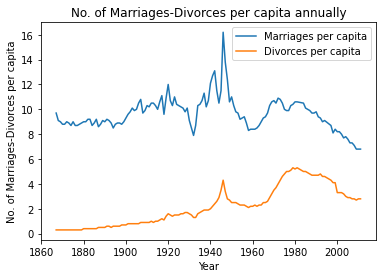

<Figure size 216x720 with 0 Axes>

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

relation = pd.read_csv(r'resource\us-marriages-divorces-1867-2014.csv')

# create figure and axis
fig, ax = plt.subplots()

# plot each column
marriage_capita = relation.loc[relation['Marriages_per_1000'].notna()]
divorce_capita = relation.loc[relation['Divorces_per_1000'].notna()]
ax.plot(marriage_capita['Year'], marriage_capita['Marriages_per_1000'])
ax.plot(divorce_capita['Year'], divorce_capita['Divorces_per_1000'])
plt.title('No. of Marriages-Divorces per capita annually')
plt.xlabel('Year')
plt.ylabel('No. of Marriages-Divorces per capita')
plt.legend(["Marriages per capita", "Divorces per capita"], loc=1, frameon=True)
plt.figure(figsize=(3, 10))
plt.show()

#### Question 7
Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.  
Don't forget to label your axes!


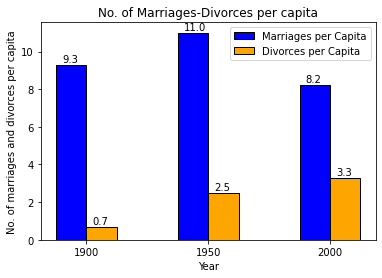

<Figure size 1080x360 with 0 Axes>

In [53]:
year_list = [1900, 1950, 2000]
relation_filter = relation.loc[relation['Year'].isin(year_list)]

X_axis = np.arange(relation_filter.shape[0])
width = 0.25    
b1 = plt.bar(X_axis, relation_filter['Marriages_per_1000'], 
        color = 'b', width = width, edgecolor = 'black', 
        label='Marriages per Capita')
b2 = plt.bar(X_axis+width, relation_filter['Divorces_per_1000'], 
        color = 'orange', width = width, edgecolor = 'black', 
        label='Divorces per Capita')
plt.xticks(X_axis + width/2,relation_filter['Year'])

for b in b1:
    yval = b.get_height()
    plt.text(b.get_x()+0.05, yval + .15, yval)
for b in b2:
    yval = b.get_height()
    plt.text(b.get_x()+0.05, yval + .15, yval)
plt.title('No. of Marriages-Divorces per capita')
plt.xlabel('Year')
plt.ylabel('No. of marriages and divorces per capita')
plt.legend()
plt.figure(figsize=(15, 5))
plt.show()

#### Question 8
Create a horizontal bar chart that compares the deadliest actors in Hollywood.   
Sort the actors by their kill count and label each bar with the corresponding actor's name.  
Don't forget to label your axes!  

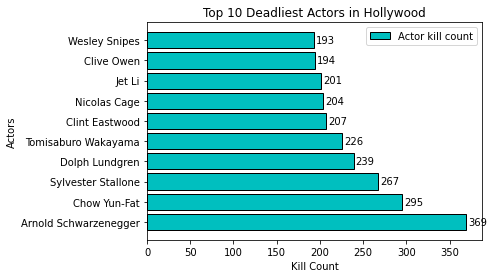

In [54]:
plt.ion()
actor = pd.read_csv(r'resource\actor_kill_counts.csv', sep=',')
actor = actor.sort_values('Count', ascending=False)

fig, ax = plt.subplots()
g=ax.barh(actor['Actor'],actor['Count'], color='c', edgecolor = 'black', label='Actor kill count')
ax.set_xlabel("Kill Count")
ax.set_ylabel("Actors")
ax.bar_label(g, label_type="edge", padding=2) 
plt.title('Top 10 Deadliest Actors in Hollywood')
ax.legend()
plt.show()

#### Question 9
Create a pie chart showing the fraction of all Roman Emperors that were assassinated.  
Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories  

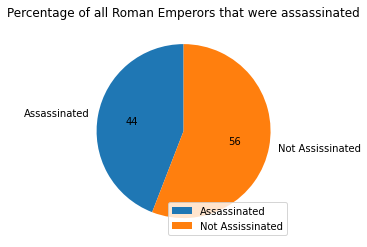

In [55]:
roman_empire = pd.read_csv(r'resource\roman-emperor-reigns.csv', sep=',')
a  = roman_empire.loc[roman_empire['Cause_of_Death'].apply(lambda x: x.lower().find('assassinated')!=-1)]
fraction = a['Cause_of_Death'].count()/roman_empire['Cause_of_Death'].count()
y = np.array([fraction, 1-fraction])

mylabels = ["Assassinated", "Not Assissinated"]
plt.pie(y, labels = mylabels, autopct='%.f', startangle = 90)
plt.legend(loc = 4)
plt.title('Percentage of all Roman Emperors that were assassinated')
plt.show() 

#### Question 10
Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.  
Don't forget to label your axes
Color each dot according to its year.  

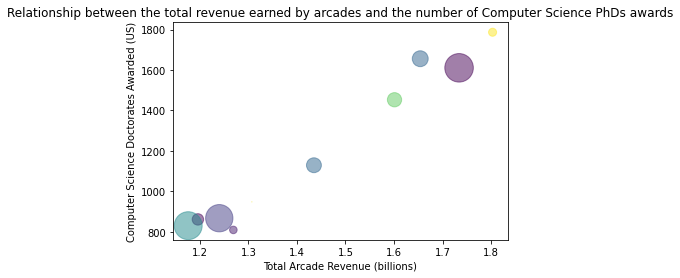

In [56]:
revenue =  pd.read_csv(r'resource\arcade-revenue-vs-cs-doctorates.csv', sep=',')
revenue
x = revenue['Total Arcade Revenue (billions)']
y = revenue['Computer Science Doctorates Awarded (US)']
colors = np.random.rand(revenue.shape[0])
area = (30 * np.random.rand(revenue.shape[0]))**2 
fig, axes = plt.subplots()
g = plt.scatter(x, y, s=area, c=colors, alpha=0.5)
axes.set_xlabel("Total Arcade Revenue (billions)")
axes.set_ylabel("Computer Science Doctorates Awarded (US)")
plt.title('Relationship between the total revenue earned by arcades and the number of Computer Science PhDs awards')
ax.legend()
plt.show()